In [7]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [8]:
# calc_classification.py
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'
# 필요하다면 sans-serif 계열을 강제 지정
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
import sys
# classification 패키지가 있는 상위 폴더를 직접 지정
sys.path.insert(0, "/home/cseomoon/appl/af_analysis-0.1.4/model")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pycaret.regression import *
# from sklearn.metrics import (
#     roc_auc_score, accuracy_score, f1_score,
#     confusion_matrix, classification_report,
#     precision_recall_curve, average_precision_score,
#     roc_curve
# )

from regression.utils.data_loader import load_and_preprocess_data

In [9]:
pd.set_option('display.max_columns', None) 

In [10]:

# 1) 경로 정의
train_fp = "/home/cseomoon/appl/af_analysis-0.1.4/model/regression/data/train/pipeline_AbNb_native_data.csv"
test_fp  = "/home/cseomoon/appl/af_analysis-0.1.4/model/regression/data/test/pipeline_ABAG_native_data.csv"

# 2) 데이터 로드 및 전처리
X_train, y_train, groups = load_and_preprocess_data(
    train_fp,
    target_column="DockQ",
    query_id_column="query"
)
X_test, y_test, _ = load_and_preprocess_data(
    test_fp,
    target_column="DockQ",
    query_id_column="query"
)

# 3) DataFrame 생성
train_df = X_train.copy()
train_df["target"] = y_train.values
test_df = X_test.copy()
test_df["target"] = y_test.values

# 4) PyCaret 설정 (5-Fold 그룹KFold, GPU 사용, 정규화)
reg_setup = setup(
    data=train_df,
    target="target",
    session_id=42,
    fold_strategy="groupkfold",
    fold=5,
    fold_groups=groups,
    normalize=True,
    use_gpu=False,
    verbose=True,
    log_experiment=False
)



Original data shape: (3650, 90)
Using 'DockQ' as the continuous target variable.
Identified 71 potential feature columns.
Checking for NaN values in potential feature columns...
Dropped 3 rows containing NaN values in one or more feature columns.
Generated 10 stratification bins from target for regression.
Processed Features (X) shape after NaN drop: (3647, 71)
Processed Target (y) shape after NaN drop: (3647,)
Processed Query IDs shape after NaN drop: (3647,)
Original data shape: (1650, 90)
Using 'DockQ' as the continuous target variable.
Identified 71 potential feature columns.
Checking for NaN values in potential feature columns...
Dropped 2 rows containing NaN values in one or more feature columns.
Generated 10 stratification bins from target for regression.
Processed Features (X) shape after NaN drop: (1648, 71)
Processed Target (y) shape after NaN drop: (1648,)
Processed Query IDs shape after NaN drop: (1648,)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(3647, 72)"
4,Transformed data shape,"(3647, 72)"
5,Transformed train set shape,"(2552, 72)"
6,Transformed test set shape,"(1095, 72)"
7,Numeric features,71
8,Preprocess,True
9,Imputation type,simple


In [12]:
train_df.columns


Index(['fraction_disordered', 'has_clash', 'ipTM', 'pTM', 'ranking_confidence',
       'iptm_A', 'iptm_H', 'iptm_L', 'ptm_A', 'ptm_H', 'ptm_L',
       'chain_pair_iptm_AH', 'chain_pair_iptm_AL', 'chain_pair_iptm_HL',
       'chain_pair_pae_min_AH', 'chain_pair_pae_min_AL',
       'chain_pair_pae_min_HL', 'chain_plddt_A', 'chain_pae_A',
       'chain_plddt_H', 'chain_pae_H', 'chain_plddt_L', 'chain_pae_L',
       'chain_pair_pae_AH', 'chain_pair_pae_AL', 'chain_pair_pae_HL',
       'avg_model_plddt', 'avg_internal_pae', 'avg_pair_pae', 'plddt_H3',
       'plddt_L3', 'contacts_AH', 'interface_plddt_AH', 'interface_pae_AH',
       'contacts_AL', 'interface_plddt_AL', 'interface_pae_AL', 'contacts_HL',
       'interface_plddt_HL', 'interface_pae_HL', 'total_contacts',
       'avg_interface_plddt', 'avg_interface_pae', 'pdockq_AH', 'pdockq_AL',
       'pdockq_HL', 'pdockq', 'pdockq2_AH', 'pdockq2_AL', 'pdockq2_HL',
       'pdockq2', 'LIS_AH', 'LIS_AL', 'LIS_HL', 'avg_LIS', 'piTM', 'pIS',
  

In [13]:
# 5) 모델 비교 및 선택 (전체 모델 대상, 내부 CV 결과 확인)
top5 = compare_models(
    n_select=5,
    sort="R2",
    exclude=['lightgbm']
)
print("=== Top 5 모델 (내부 5-Fold CV) ===")
print(pull().head(5))



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0962,0.0223,0.1459,0.7178,0.1094,4.9152,0.3820
et,Extra Trees Regressor,0.1011,0.0258,0.1582,0.6813,0.1215,4.6380,0.0840
catboost,CatBoost Regressor,0.1036,0.0263,0.1605,0.6781,0.1236,4.6435,2.7600
ada,AdaBoost Regressor,0.1356,0.0297,0.1711,0.6350,0.1365,10.1462,0.1840
huber,Huber Regressor,0.1183,0.0287,0.1679,0.6323,0.1212,5.0725,0.4720
br,Bayesian Ridge,0.1225,0.0295,0.1692,0.6231,0.1243,6.6962,0.3820
ridge,Ridge Regression,0.1264,0.0308,0.1734,0.6093,0.1272,6.8897,0.3820
rf,Random Forest Regressor,0.1115,0.0315,0.1756,0.6025,0.1337,5.1635,0.5260
lr,Linear Regression,0.1310,0.0328,0.1789,0.5862,0.1310,7.0798,2.2100
gbr,Gradient Boosting Regressor,0.1174,0.0359,0.1891,0.5523,0.1404,4.9219,0.5740


=== Top 5 모델 (내부 5-Fold CV) ===
                                Model     MAE     MSE    RMSE      R2   RMSLE  \
omp       Orthogonal Matching Pursuit  0.0962  0.0223  0.1459  0.7178  0.1094   
et              Extra Trees Regressor  0.1011  0.0258  0.1582  0.6813  0.1215   
catboost           CatBoost Regressor  0.1036  0.0263  0.1605  0.6781  0.1236   
ada                AdaBoost Regressor  0.1356  0.0297  0.1711  0.6350  0.1365   
huber                 Huber Regressor  0.1183  0.0287  0.1679  0.6323  0.1212   

             MAPE  TT (Sec)  
omp        4.9152     0.382  
et         4.6380     0.084  
catboost   4.6435     2.760  
ada       10.1462     0.184  
huber      5.0725     0.472  


In [14]:
best=create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1037,0.0258,0.1606,0.5308,0.1198,5.2459
1,0.1076,0.0320,0.1788,0.5740,0.1379,6.0285
2,0.0778,0.0117,0.1084,0.9036,0.0753,1.9882
3,0.1144,0.0303,0.1741,0.7478,0.1332,5.9854
4,0.0774,0.0115,0.1075,0.8329,0.0808,5.3278
Mean,0.0962,0.0223,0.1459,0.7178,0.1094,4.9152
Std,0.0156,0.0089,0.0316,0.1445,0.0264,1.4988


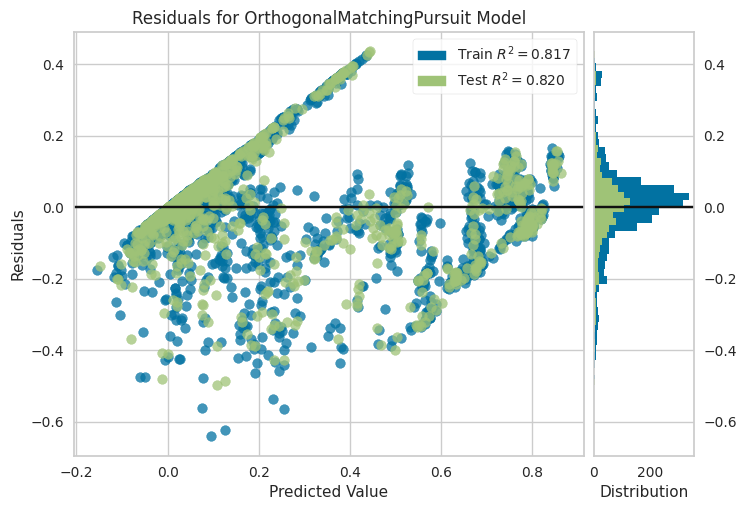

In [15]:
plot_model(best, plot='residuals' )

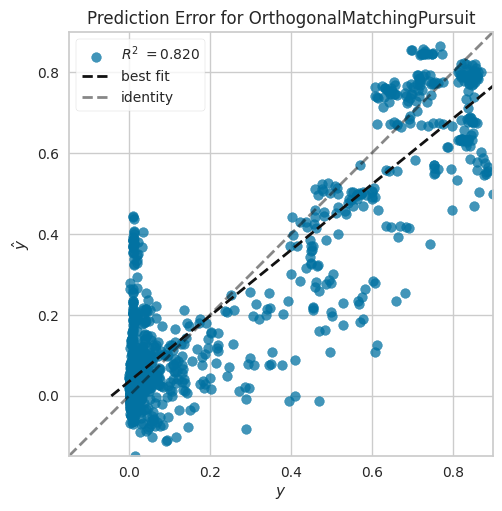

In [16]:
plot_model(best, plot='error' )

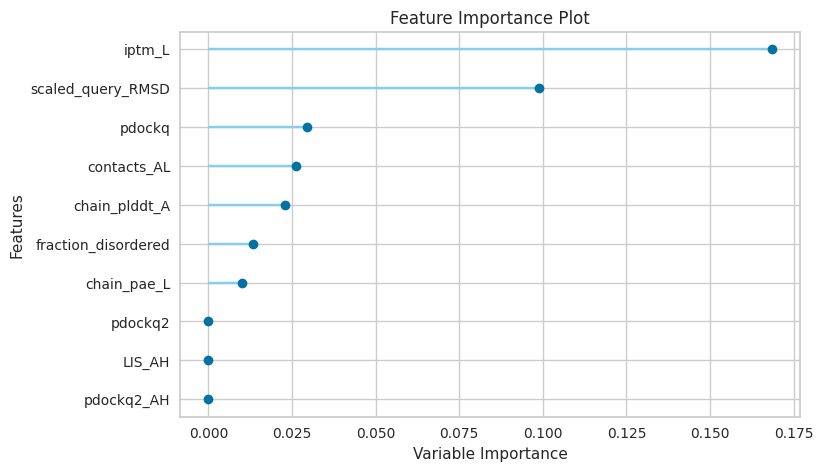

In [17]:
plot_model(best, plot = 'feature')

In [18]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,0.0878,0.0166,0.1287,0.8199,0.0979,4.3983


,fraction_disordered,has_clash,ipTM,pTM,ranking_confidence,iptm_A,iptm_H,iptm_L,ptm_A,ptm_H,...,scaled_model_RMSD,scaled_query_RMSD,dG_separated,dSASA_int,nres_int,delta_unsatHbonds,packstat,dG_dSASA_norm,target,prediction_label
415,0.04,0.0,0.48,0.61,0.52,0.14,0.51,0.50,0.77,0.88,...,0.027707,0.048647,144.201996,2553.383301,95.0,29.0,0.644112,0.056475,0.013447,-0.058139
2931,0.00,0.0,0.38,0.65,0.44,0.25,0.57,0.54,0.85,0.85,...,0.480689,0.352904,86.844345,2285.908936,91.0,27.0,0.566910,0.037991,0.312698,0.227662
3198,0.00,0.0,0.26,0.71,0.35,0.14,0.50,0.50,0.89,0.88,...,0.035533,0.021210,159.935074,1310.752441,60.0,18.0,0.677988,0.122018,0.154557,0.087173
298,0.00,0.0,0.90,0.90,0.90,0.87,0.89,0.88,0.82,0.90,...,0.987093,0.979658,-44.627316,2098.313965,87.0,14.0,0.672718,-0.021268,0.853387,0.799778
1875,0.00,0.0,0.44,0.58,0.47,0.10,0.49,0.49,0.88,0.87,...,0.023783,0.054169,-6.009856,1926.106323,79.0,8.0,0.595237,-0.003120,0.011540,0.085004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.00,0.0,0.42,0.55,0.45,0.30,0.58,0.60,0.83,0.88,...,0.461292,0.390406,265.661926,1707.227905,61.0,14.0,0.692011,0.155610,0.259088,0.213162
946,0.00,0.0,0.38,0.51,0.40,0.12,0.49,0.49,0.62,0.87,...,0.060152,0.035308,326.442749,1978.795044,77.0,14.0,0.707662,0.164970,0.016474,-0.029492
462,0.00,0.0,0.44,0.57,0.46,0.13,0.49,0.49,0.87,0.88,...,0.029639,0.031912,45.150341,1270.186279,50.0,6.0,0.744127,0.035546,0.007342,0.044400
3521,0.01,0.0,0.21,0.58,0.29,0.12,0.48,0.47,0.67,0.85,...,0.010043,0.009804,47.935020,1513.949463,71.0,12.0,0.640938,0.031662,0.004784,0.016986


In [86]:
new_data=test_df.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,fraction_disordered,has_clash,ipTM,pTM,ranking_confidence,iptm_A,iptm_H,iptm_L,ptm_A,ptm_H,...,query_avg_RMSD,scaled_RMSD_ratio,scaled_model_RMSD,scaled_query_RMSD,dG_separated,dSASA_int,nres_int,delta_unsatHbonds,packstat,dG_dSASA_norm
0,0.00,0.0,0.57,0.70,0.60,0.11,0.50,0.50,0.72,0.88,...,39.246214,0.559606,0.056252,0.044806,19.708321,1472.935064,47.0,17.0,0.713741,0.013380
1,0.01,0.0,0.57,0.70,0.61,0.12,0.50,0.50,0.73,0.88,...,39.246214,0.579124,0.060631,0.044806,59.586646,1843.671070,60.0,21.0,0.674735,0.032320
2,0.00,0.0,0.55,0.69,0.58,0.07,0.48,0.48,0.74,0.89,...,39.246214,0.401814,0.030546,0.044806,56.250134,1609.165063,53.0,11.0,0.741571,0.034956
3,0.00,0.0,0.57,0.70,0.60,0.12,0.50,0.50,0.73,0.87,...,39.246214,0.609161,0.068129,0.044806,27.314403,1546.077081,54.0,21.0,0.729679,0.017667
4,0.01,0.0,0.57,0.70,0.60,0.11,0.50,0.50,0.75,0.89,...,39.246214,0.419686,0.032811,0.044806,20.159038,1206.538153,43.0,6.0,0.749578,0.016708


In [87]:
# 6) 최상위 모델 최종화
best = top5[0]
final_model = finalize_model(best)

predictions = predict_model(final_model, data=new_data)
predictions.head()


,fraction_disordered,has_clash,ipTM,pTM,ranking_confidence,iptm_A,iptm_H,iptm_L,ptm_A,ptm_H,...,scaled_model_RMSD,scaled_query_RMSD,dG_separated,dSASA_int,nres_int,delta_unsatHbonds,packstat,dG_dSASA_norm,prediction_label,prediction_score
0,0.00,0.0,0.57,0.70,0.60,0.11,0.50,0.50,0.72,0.88,...,0.056252,0.044806,19.708321,1472.935059,47.0,17.0,0.713741,0.013380,0,0.9715
1,0.01,0.0,0.57,0.70,0.61,0.12,0.50,0.50,0.73,0.88,...,0.060631,0.044806,59.586647,1843.671021,60.0,21.0,0.674735,0.032320,0,0.9835
2,0.00,0.0,0.55,0.69,0.58,0.07,0.48,0.48,0.74,0.89,...,0.030546,0.044806,56.250134,1609.165039,53.0,11.0,0.741571,0.034956,0,0.9957
3,0.00,0.0,0.57,0.70,0.60,0.12,0.50,0.50,0.73,0.87,...,0.068129,0.044806,27.314404,1546.077026,54.0,21.0,0.729679,0.017667,0,0.9827
4,0.01,0.0,0.57,0.70,0.60,0.11,0.50,0.50,0.75,0.89,...,0.032811,0.044806,20.159039,1206.538208,43.0,6.0,0.749578,0.016708,0,0.9842


In [88]:
X_test

,fraction_disordered,has_clash,ipTM,pTM,ranking_confidence,iptm_A,iptm_H,iptm_L,ptm_A,ptm_H,...,query_avg_RMSD,scaled_RMSD_ratio,scaled_model_RMSD,scaled_query_RMSD,dG_separated,dSASA_int,nres_int,delta_unsatHbonds,packstat,dG_dSASA_norm
0,0.00,0.0,0.57,0.70,0.60,0.11,0.50,0.50,0.72,0.88,...,39.246214,0.559606,0.056252,0.044806,19.708321,1472.935064,47.0,17.0,0.713741,0.013380
1,0.01,0.0,0.57,0.70,0.61,0.12,0.50,0.50,0.73,0.88,...,39.246214,0.579124,0.060631,0.044806,59.586646,1843.671070,60.0,21.0,0.674735,0.032320
2,0.00,0.0,0.55,0.69,0.58,0.07,0.48,0.48,0.74,0.89,...,39.246214,0.401814,0.030546,0.044806,56.250134,1609.165063,53.0,11.0,0.741571,0.034956
3,0.00,0.0,0.57,0.70,0.60,0.12,0.50,0.50,0.73,0.87,...,39.246214,0.609161,0.068129,0.044806,27.314403,1546.077081,54.0,21.0,0.729679,0.017667
4,0.01,0.0,0.57,0.70,0.60,0.11,0.50,0.50,0.75,0.89,...,39.246214,0.419686,0.032811,0.044806,20.159038,1206.538153,43.0,6.0,0.749578,0.016708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0.01,0.0,0.21,0.65,0.30,0.13,0.48,0.48,0.74,0.86,...,78.955890,0.307621,0.005123,0.011457,893.272378,1979.008027,103.0,15.0,0.550770,0.451374
1646,0.01,0.0,0.21,0.65,0.31,0.14,0.48,0.48,0.74,0.86,...,78.955890,0.532362,0.013022,0.011457,223.208736,1584.054934,63.0,17.0,0.608707,0.140910
1647,0.01,0.0,0.21,0.65,0.30,0.15,0.49,0.48,0.74,0.86,...,78.955890,0.570071,0.015135,0.011457,1050.032869,1595.052750,64.0,7.0,0.610768,0.658306
1648,0.01,0.0,0.21,0.65,0.30,0.14,0.49,0.48,0.74,0.86,...,78.955890,0.531169,0.012960,0.011457,19.805114,1530.011186,65.0,3.0,0.673359,0.012944


In [89]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1645    0
1646    0
1647    0
1648    0
1649    0
Name: __target__DockQ, Length: 1648, dtype: int64

In [90]:
# interpret_model(final_model, X_new_sample=X_test,y_new_sample=y_test)

In [91]:
# lb = get_leaderboard()